In [2]:
#Initialization cell

%matplotlib notebook
import expdata as ex
import takatools as tk
#import juntools as jt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import lmfit
import xarray

import win32clipboard

import math
from scipy.optimize import curve_fit
import random
from scipy.fftpack import fft, fftfreq
from scipy.constants import hbar, e, m_e, pi, k, mu_0
from scipy import signal
import datetime
import h5py


def  get_clipboard():
    win32clipboard.OpenClipboard()
    data = win32clipboard.GetClipboardData()
    win32clipboard.CloseClipboard()
    return data


def  set_clipboard( text ):
    win32clipboard.OpenClipboard()
    # win32clipboard.EmptyClipboard()        # これは要らない？？？
    win32clipboard.SetClipboardText( text )
    win32clipboard.CloseClipboard()

#directory
import os

# please enter your directry placed raw data
path = r'C:\Users\User\Documents\repos\QD_LDS_readout\data\Tohoku data'


if not os.path.exists(path):
    raise Exception()

def h5files(path = path):
    return [file_name for file_name in os.listdir(path) if file_name.endswith('.h5')]

def aindex(array, value):
    return np.argmin(np.abs(array-value))

holders = ['20171005',]
def load_data(filename = '', load_now = False):
    try:
        return ex.load_data(filename = filename, load_now = load_now)
    except:
        for holder in holders:
            new_filename = '..\%s\%s.h5' %(holder, filename.replace('.h5', ''))
            print(new_filename)
            return ex.load_data(filename = new_filename, load_now = load_now)
%cd $path

# format figures for a paper
plt.rcParams['font.family'] ='Segoe UI'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.xmargin'] = 0. #0
plt.rcParams['axes.ymargin'] = 0. #0

C:\Users\User\Documents\repos\QD_LDS_readout\data\Tohoku data


# T1 relaxation process

## Time trace

HTML(value='<pre><code>C = -0.9 V, L = -0.92 V, P1 = -0.32725 V, T1 = -0.73 V, P2 = -0.1589 V, T2 = -1.165 V, …

<IPython.core.display.Javascript object>


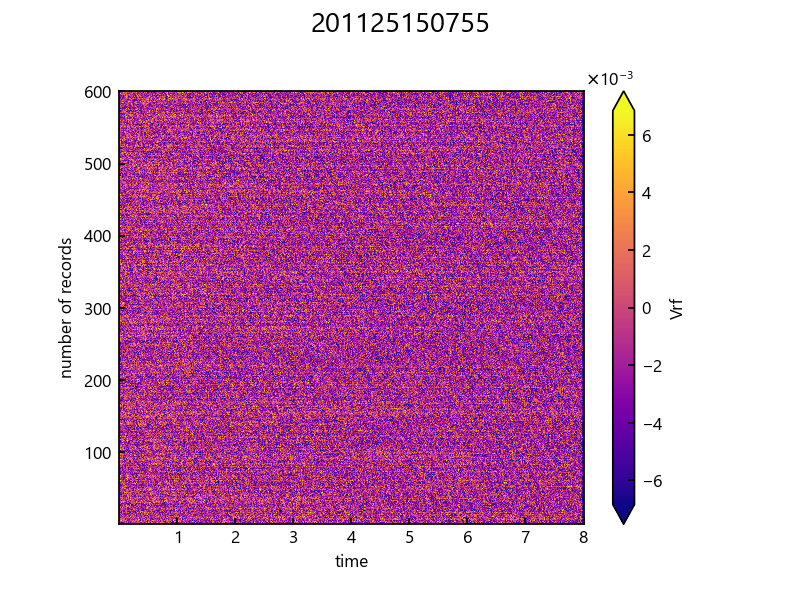

<IPython.core.display.Javascript object>


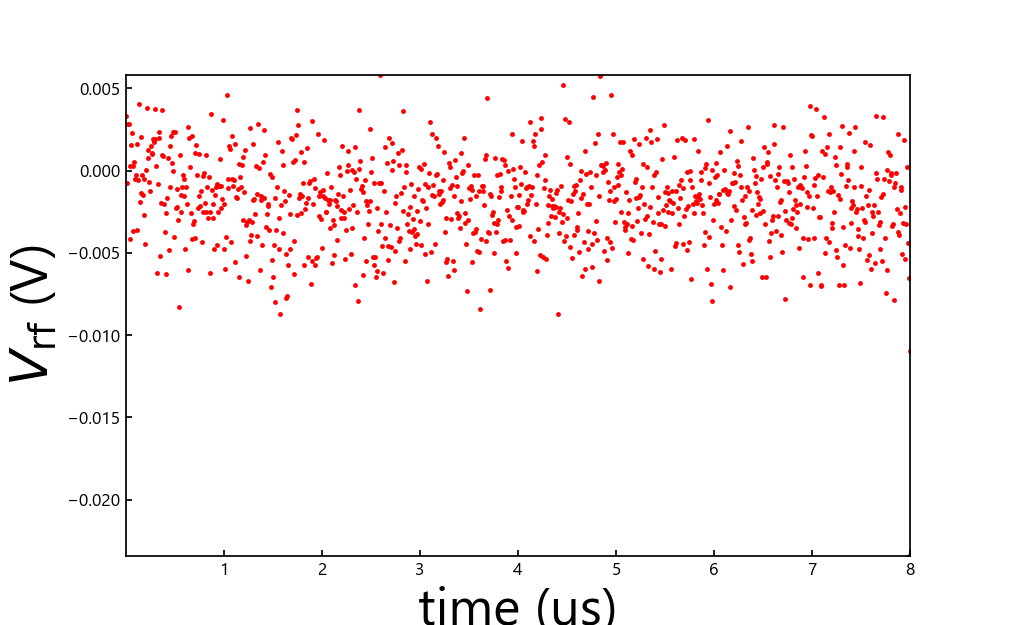

In [6]:
d  = ex.load_data(201125150755)

print(d)

i=0 # please use i = 0~599
tk.plot(d)
time = d['time'].values
vrf = d['Vrf'].values[i]


S_1, S_m = 36, 3600
s = S_1 * S_m / (S_1 * len(time) + S_m) # see
#Draw graph with cutted plot
size = 5
# fig, ax1 = plt.subplots(figsize = (size*(1+math.sqrt(5))/2,size))
fig = plt.figure(figsize= (size*(1+math.sqrt(5))/2,size))
fig.patch.set_facecolor('white'); fig.patch.set_alpha(1.0)#; plt.tight_layout()
plt.scatter(time,vrf, s = s, color="red")
plt.xlabel("time (us)",fontname="Segoe UI",fontsize=30)
plt.ylabel("$V_{\mathrm{rf}}$ (V)",fontname="Segoe UI",fontsize=30)
# plt.savefig('fig.png',bbox_inches='tight',pad_inches=0)
plt.show()

## Time integration of histgram

<IPython.core.display.Javascript object>


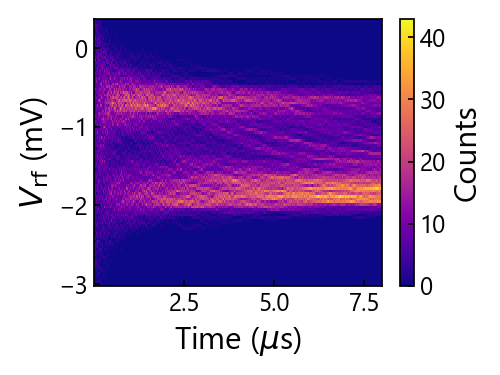

In [3]:

d  = ex.load_data(201125150755)
fig, ax = plt.subplots(figsize=(4,3))
fig.patch.set_alpha(1.0)
fig.patch.set_facecolor('w')

hist = tk.hist(tk.boxcar(d.Vrf))

x = hist['time']
y = hist['bins']
z = hist
X, Y = np.meshgrid(x, y*1000)
Z = z
plt.pcolormesh(X, Y, Z, cmap='plasma')#, vmax=50)#, vmin=-0.001, vmax=0.001)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
pp.set_label('Counts',fontsize=18) #カラーバーのラベル

pp.ax.tick_params(labelsize=14)
plt.tick_params(labelsize=14)

plt.xlabel(r'Time ($\mu$s)', fontsize=18)
plt.ylabel('$V_{\mathrm{rf}}$ (mV)', fontsize=18)

plt.tight_layout()
tk.copy2clipboard(plt)
# fig.savefig("fig3_3.png", dpi=600)

# 2D stability diagram

HTML(value="<pre><code>C = -0.9 V, L = -0.92 V, P1 = -0.3296 V, T1 = -0.73 V, P2 = -0.1582 V, T2 = -1.165 V, P…

<IPython.core.display.Javascript object>


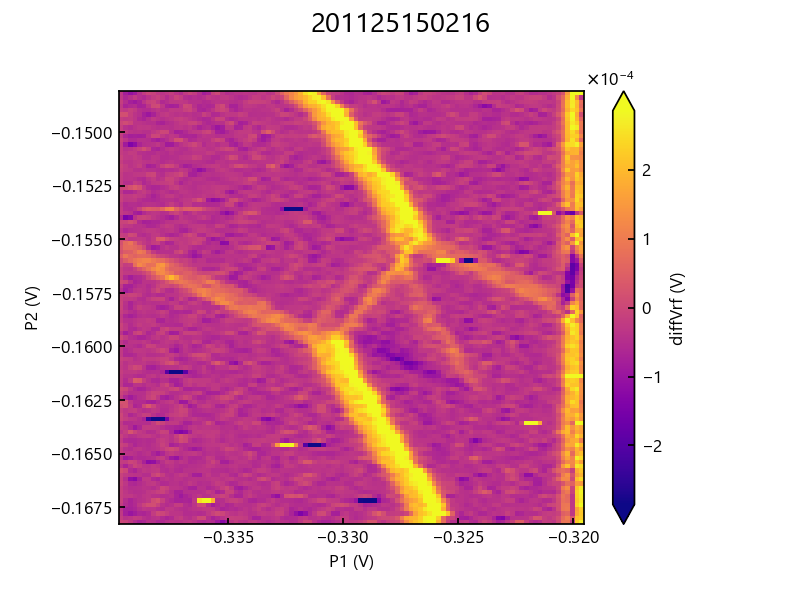

(dx,dy)=(0.005294354838709686, -0.004896969696969677)
Delta=0.007211830930575672


In [4]:

d= ex.load_data(201125150216)
# #d = ex.load_data(h5files()[-1], load_now = True)
# d = ex.load_data('211208215552')

d['diffVrf'] = tk.differentiate(d['Vrf'])
tk.plot(d)#, ylog = True)

(x1,y1) = (0.182715527027696, -0.3839060862510022)
(x2,y2) = (0.1880098818664057, -0.3888030559479719)
(dx,dy) = (x2-x1,y2-y1)
x = np.linspace(x1, x2, 2)
y = np.linspace(y1, y2, 2)
l=np.sqrt(dx**2+dy**2)
plt.plot(x,y, c='k', ls='-')
print('(dx,dy)='+str((dx,dy)))
print('Delta='+str(l))

#print(d.attrs['comment'])

In [3]:
d  = ex.load_data(200409155046)

print(d)

<xarray.Dataset>
Dimensions:  (P1 (V): 10, time: 6250000)
Coordinates:
    P1       (P1 (V)) float64 -0.1323 -0.1323 -0.1323 ... -0.1323 -0.1323
  * time     (time) float64 0.0 8.0 16.0 24.0 32.0 ... 5e+07 5e+07 5e+07 5e+07
  * P1 (V)   (P1 (V)) float64 -0.1323 -0.1323 -0.1323 ... -0.1323 -0.1323
Data variables:
    Vrf      (P1 (V), time) float32 ...
Attributes:
    filename:  200409155046
    comment:   C = -0.92 V, L = -1.09 V, P1 = -0.13225 V, T1 = -0.39 V, P2 = ...
